In [1]:
# necessary imports
import pygrib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
# Style Dictionary to standarize plotting
# scheme between different python scripts 
styledict = {'xtick.labelsize':21,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':21,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':22,
             'axes.titlesize':22,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [3]:
# set working directory
import os
os.chdir("/Users/kaeliaokamura/Desktop/Shen UAV Research/Oct5")

In [4]:
# load all 24 hours of data from October 5, 2021
hour_0 = pygrib.open('urma2p5.t00z.2dvaranl_ndfd.grb2_wexp')
hour_1 = pygrib.open('urma2p5.t01z.2dvaranl_ndfd.grb2_wexp')
hour_2 = pygrib.open('urma2p5.t02z.2dvaranl_ndfd.grb2_wexp')
hour_3 = pygrib.open('urma2p5.t03z.2dvaranl_ndfd.grb2_wexp')
hour_4 = pygrib.open('urma2p5.t04z.2dvaranl_ndfd.grb2_wexp')
hour_5 = pygrib.open('urma2p5.t05z.2dvaranl_ndfd.grb2_wexp')
hour_6 = pygrib.open('urma2p5.t06z.2dvaranl_ndfd.grb2_wexp')
hour_7 = pygrib.open('urma2p5.t07z.2dvaranl_ndfd.grb2_wexp')
hour_8 = pygrib.open('urma2p5.t08z.2dvaranl_ndfd.grb2_wexp')
hour_9 = pygrib.open('urma2p5.t09z.2dvaranl_ndfd.grb2_wexp')
hour_10 = pygrib.open('urma2p5.t10z.2dvaranl_ndfd.grb2_wexp')
hour_11 = pygrib.open('urma2p5.t11z.2dvaranl_ndfd.grb2_wexp')
hour_12 = pygrib.open('urma2p5.t12z.2dvaranl_ndfd.grb2_wexp')
hour_13 = pygrib.open('urma2p5.t13z.2dvaranl_ndfd.grb2_wexp')
hour_14 = pygrib.open('urma2p5.t14z.2dvaranl_ndfd.grb2_wexp')
hour_15 = pygrib.open('urma2p5.t15z.2dvaranl_ndfd.grb2_wexp')
hour_16 = pygrib.open('urma2p5.t16z.2dvaranl_ndfd.grb2_wexp')
hour_17 = pygrib.open('urma2p5.t17z.2dvaranl_ndfd.grb2_wexp')
hour_18 = pygrib.open('urma2p5.t18z.2dvaranl_ndfd.grb2_wexp')
hour_19 = pygrib.open('urma2p5.t19z.2dvaranl_ndfd.grb2_wexp')
hour_20 = pygrib.open('urma2p5.t20z.2dvaranl_ndfd.grb2_wexp')
hour_21 = pygrib.open('urma2p5.t21z.2dvaranl_ndfd.grb2_wexp')
hour_22 = pygrib.open('urma2p5.t22z.2dvaranl_ndfd.grb2_wexp')
hour_23 = pygrib.open('urma2p5.t23z.2dvaranl_ndfd.grb2_wexp')

In [5]:
# get u wind for each hour
for i in range(24):
    exec(f'uwind_{i} = hour_{i}[5].values[600, 450:700]')
    
# get v wind for each hour
for i in range(24):
    exec(f'vwind_{i} = hour_{i}[6].values[600, 450:700]')
    
# get wind speed for each hour
for i in range(24):
    exec(f'speed_{i} = hour_{i}[9].values[600, 450:700]')
    
# get wind gust for each hour
for i in range(24):
    exec(f'gust_{i} = hour_{i}[10].values[600, 450:700]')

In [6]:
# combine all uwinds together
uwinds = []
for i in range(24):
    exec(f'uwinds.append(uwind_{i})')

In [7]:
# combine all gusts together
gusts = []
for i in range(24):
    exec(f'gusts.append(gust_{i})')

In [ ]:
## Fitter Package

,sumsquare_error,aic,bic,kl_div
genextreme,0.122661,151.442884,-1888.383372,0.128011
gamma,0.123804,153.013894,-1886.065093,0.131960
rayleigh,0.155841,147.027845,-1834.052404,0.168490
weibull_min,0.218434,167.653432,-1744.118530,0.173868


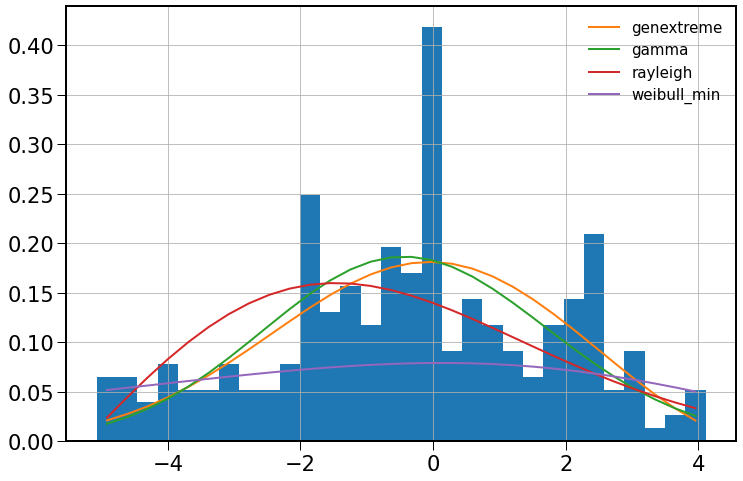

In [8]:
# fitter package with modifications for wind_0
f0 = Fitter(uwind_0,
           distributions= ['weibull_min','rayleigh','gamma','genextreme'],
           timeout=100,bins=30,xmin= -6, xmax = 5)
f0.fit()
f0.summary()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 20 µs


,sumsquare_error,aic,bic,kl_div
weibull_min,0.050819,188.160300,-2013.988597,inf
genextreme,0.063623,184.064543,-1960.060017,inf
gamma,0.067657,188.249861,-1945.303464,inf
rayleigh,0.399195,inf,-1524.785329,inf


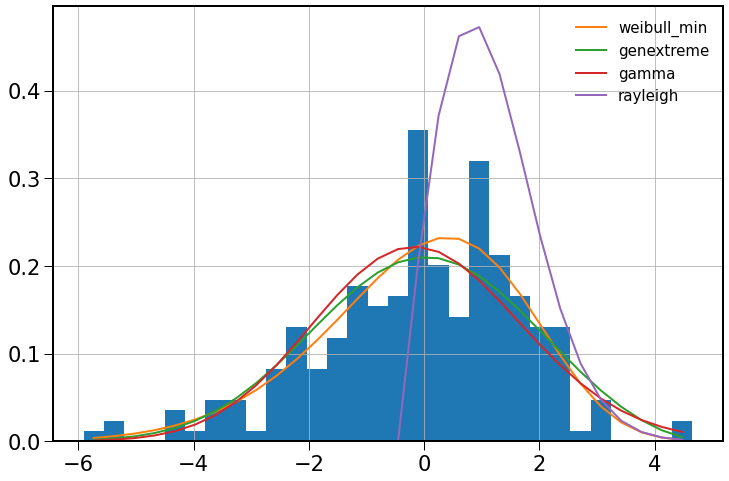

In [9]:
# fitter package with modifications for wind_7

%time
f2 = Fitter(uwind_2,
           distributions= ['weibull_min','rayleigh','gamma','genextreme'],
           timeout=100,bins=30,xmin= -6, xmax = 5)
f2.fit()
f2.summary()

,sumsquare_error,aic,bic,kl_div
genextreme,0.114104,167.204419,-1906.461846,inf
gamma,0.126449,170.787078,-1880.779385,inf
rayleigh,0.227388,146.880858,-1739.597079,inf
weibull_min,1.473260,191.937607,-1266.931510,inf


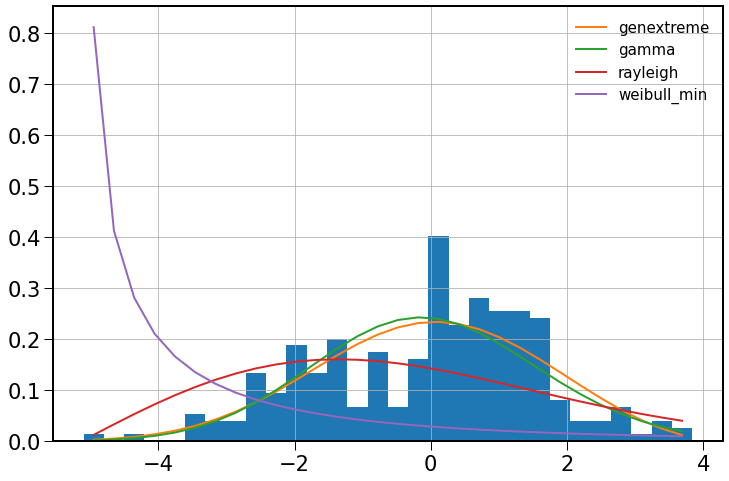

In [10]:
# fitter package with modifications for wind_14
f4 = Fitter(uwind_4,
           distributions= ['weibull_min','rayleigh','gamma','genextreme'],
           timeout=100,bins=30,xmin= -6, xmax = 5)
f4.fit()
f4.summary()

,sumsquare_error,aic,bic,kl_div
gamma,0.196639,170.060264,-1681.152023,inf
genextreme,0.202763,167.338188,-1673.822092,inf
rayleigh,0.202950,inf,-1679.077612,0.193247
weibull_min,0.207134,166.191501,-1668.724078,inf


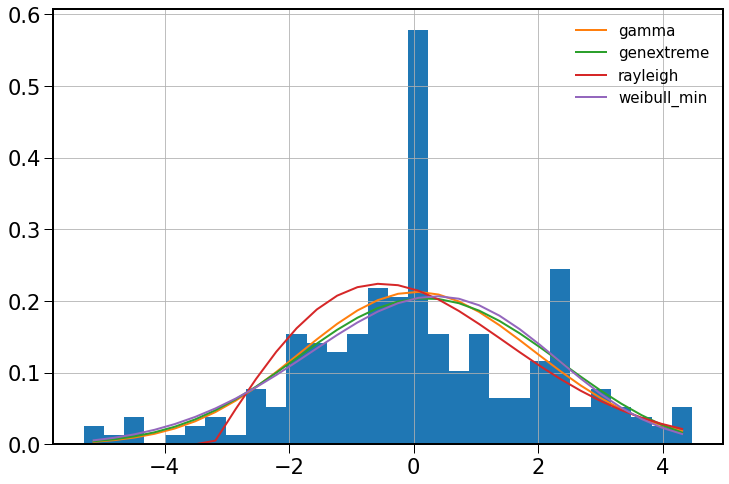

In [11]:
# fitter package with modifications for wind_21
f6 = Fitter(uwind_6,
           distributions= ['weibull_min','rayleigh','gamma','genextreme'],
           timeout=100,bins=30,xmin= -6, xmax = 5)
f6.fit()
f6.summary()

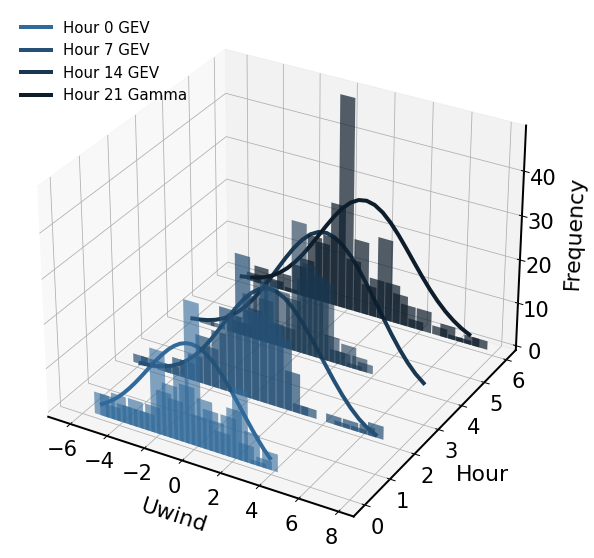

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
# determine number of bins to use
nbins = 30

# choose the desired hours
ys = uwinds[0]
ys2 = uwinds[2]
ys3 = uwinds[4]
ys4 = uwinds[6]

# create histograms
hist, bins = np.histogram(ys, bins=nbins)
hist2, bins2 = np.histogram(ys2, bins=nbins)
hist3, bins3 = np.histogram(ys3, bins=nbins)
hist4, bins4 = np.histogram(ys4, bins=nbins)

# determine bin spacing
xs = (bins[:-1] + bins[1:])/2
xs2 = (bins2[:-1] + bins2[1:])/2
xs3 = (bins3[:-1] + bins3[1:])/2
xs4 = (bins4[:-1] + bins4[1:])/2

# get points for distributions using the #1 fitted distributions from below
x1 = np.linspace(np.min(xs),np.max(xs),30)
y1 = np.repeat(0,30)
z1 = f0.fitted_pdf['genextreme']*125

x2 = np.linspace(np.min(xs2),np.max(xs2),30)
y2 = np.repeat(2,30)
z2 = f2.fitted_pdf['genextreme']*125

x3 = np.linspace(np.min(xs2),np.max(xs2),30)
y3 = np.repeat(4,30)
z3 = f4.fitted_pdf['genextreme']*125

x4 = np.linspace(np.min(xs2),np.max(xs2),30)
y4 = np.repeat(6,30)
z4 = f6.fitted_pdf['gamma']*125

# plot the 3D histograms on the same plot
ax.bar(xs, hist, zs=0, zdir='y', color='#316a9a', alpha=0.6)
ax.plot(x1,y1,z1, color = '#316a9a', linewidth = 4, label = "Hour 0 GEV")
ax.bar(xs2, hist2, zs=2, zdir='y', color='#255075', alpha=0.7)
ax.plot(x2,y2,z2, color = '#255075', linewidth = 4, label = "Hour 7 GEV")
ax.bar(xs3, hist3, zs=4, zdir='y', color='#193750', alpha=0.6)
ax.plot(x3,y3,z3, color = '#193750', linewidth = 4, label = "Hour 14 GEV")
ax.bar(xs4, hist4, zs=6, zdir='y', color='#0d1d2b', alpha=0.7)
ax.plot(x4,y4,z4, color = '#0d1d2b', linewidth = 4, label = "Hour 21 Gamma")

# set labels
ax.set_xlabel('Uwind', labelpad = 15)
ax.set_ylabel('Hour', labelpad = 20)
ax.set_zlabel('Frequency', labelpad = 12)

ax.legend(loc = 'upper left')

plt.savefig('../Uwind_plot')
plt.show()

,sumsquare_error,aic,bic,kl_div
genextreme,0.223957,144.908277,-1737.876043,inf
gamma,0.239271,152.622167,-1721.340888,inf
rayleigh,0.606655,129.644870,-1494.270879,inf
weibull_min,1.487672,146.368481,-1264.497679,inf


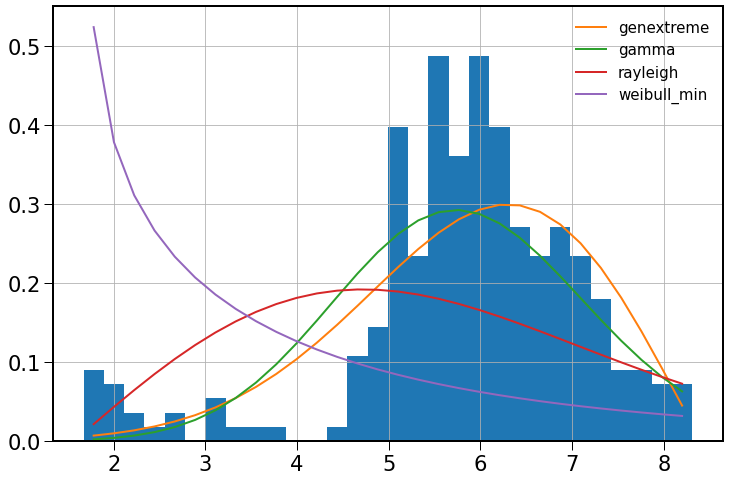

In [13]:
# fitter package with modifications for wind_0
f0_g = Fitter(gust_0,
           distributions= ['weibull_min','rayleigh','gamma','genextreme'],
           timeout=100,bins=30,xmin= 0, xmax = 15)
f0_g.fit()
f0_g.summary()

,sumsquare_error,aic,bic,kl_div
genextreme,0.092710,228.951959,-1958.370618,inf
gamma,0.103609,233.646846,-1930.584241,inf
rayleigh,0.114025,249.708192,-1912.155920,inf
weibull_min,0.128840,226.788399,-1876.096912,inf


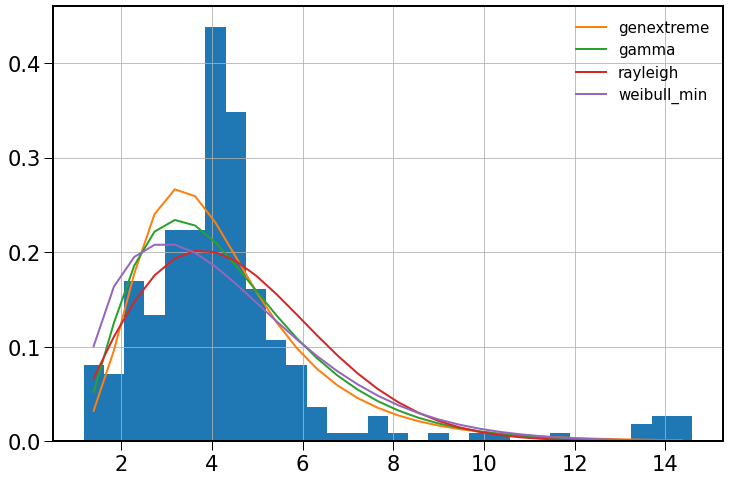

In [14]:
# fitter package with modifications for wind_7
f2_g = Fitter(gust_2,
           distributions= ['weibull_min','rayleigh','gamma','genextreme'],
           timeout=100,bins=30,xmin= 0, xmax = 15)
f2_g.fit()
f2_g.summary()

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


,sumsquare_error,aic,bic,kl_div
genextreme,0.065569,194.155739,-2044.964548,inf
gamma,0.080781,191.501021,-1992.804363,inf
weibull_min,0.096378,188.861510,-1948.669155,inf
rayleigh,0.100889,192.827562,-1942.755068,inf


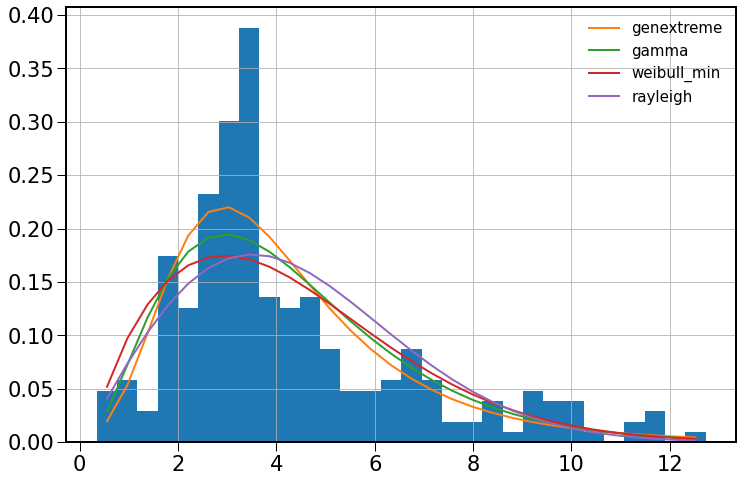

In [15]:
# fitter package with modifications for wind_4
%time
f4_g = Fitter(gust_4,
           distributions= ['weibull_min','rayleigh','gamma','genextreme'],
           timeout=100,bins=30,xmin= 0, xmax = 15)
f4_g.fit()
f4_g.summary()

,sumsquare_error,aic,bic,kl_div
weibull_min,0.023182,185.306365,-2304.895331,inf
gamma,0.026628,185.015314,-2270.247220,inf
rayleigh,0.030571,190.790361,-2241.247778,inf
genextreme,0.033077,188.637320,-2216.028828,inf


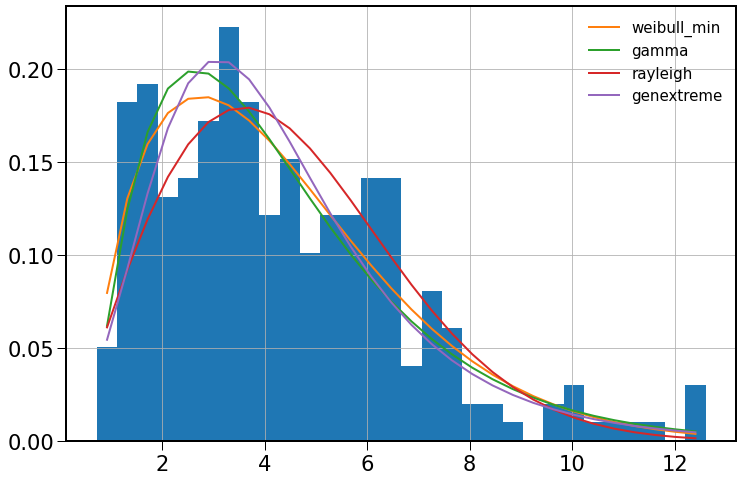

In [16]:
# fitter package with modifications for wind_7
f6_g = Fitter(gust_6,
           distributions= ['weibull_min','rayleigh','gamma','genextreme'],
           timeout=100,bins=30,xmin= 0, xmax = 15)
f6_g.fit()
f6_g.summary()

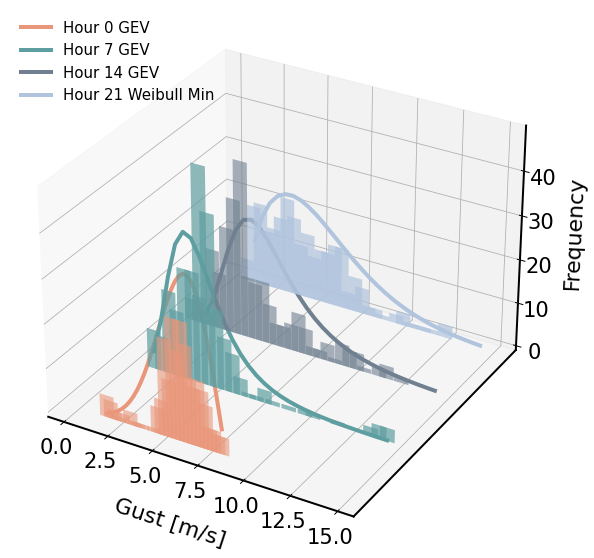

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
# determine number of bins to use
nbins = 30

# choose the desired hours
ys = gusts[0]
ys2 = gusts[2]
ys3 = gusts[4]
ys4 = gusts[6]

# create histograms
hist, bins = np.histogram(ys, bins=nbins)
hist2, bins2 = np.histogram(ys2, bins=nbins)
hist3, bins3 = np.histogram(ys3, bins=nbins)
hist4, bins4 = np.histogram(ys4, bins=nbins)

# determine bin spacing
xs = (bins[:-1] + bins[1:])/2
xs2 = (bins2[:-1] + bins2[1:])/2
xs3 = (bins3[:-1] + bins3[1:])/2
xs4 = (bins4[:-1] + bins4[1:])/2

# get points for distributions using the #1 fitted distributions from below
x1 = np.linspace(np.min(xs),np.max(xs),30)
y1 = np.repeat(0,30)
z1 = f0_g.fitted_pdf['genextreme']*125

x2 = np.linspace(np.min(xs2),np.max(xs2),30)
y2 = np.repeat(2,30)
z2 = f2_g.fitted_pdf['genextreme']*125

x3 = np.linspace(np.min(xs2),np.max(xs2),30)
y3 = np.repeat(4,30)
z3 = f4_g.fitted_pdf['genextreme']*125

x4 = np.linspace(np.min(xs2),np.max(xs2),30)
y4 = np.repeat(6,30)
z4 = f6_g.fitted_pdf['weibull_min']*125

# plot the 3D histograms on the same plot
ax.bar(xs, hist, zs=0, zdir='y', color='darksalmon', alpha=0.6)
ax.plot(x1,y1,z1, color = 'darksalmon', linewidth = 4, label = "Hour 0 GEV")
ax.bar(xs2, hist2, zs=2, zdir='y', color='cadetblue', alpha=0.7)
ax.plot(x2,y2,z2, color = 'cadetblue', linewidth = 4, label = "Hour 7 GEV")
ax.bar(xs3, hist3, zs=4, zdir='y', color='slategrey', alpha=0.6)
ax.plot(x3,y3,z3, color = 'slategrey', linewidth = 4, label = "Hour 14 GEV")
ax.bar(xs4, hist4, zs=6, zdir='y', color='lightsteelblue', alpha=0.7)
ax.plot(x4,y4,z4, color = 'lightsteelblue', linewidth = 4, label = "Hour 21 Weibull Min")

# set labels
ax.set_xlabel('Gust [m/s]', labelpad = 20)
ax.set_yticks([])
ax.set_zlabel('Frequency', labelpad = 12)

ax.legend(loc = 'upper left')

plt.savefig('../Gust_plot.jpg')
plt.show()